# Training SlimeVolleyball with Stable Baseline 3.

<font color="red"> If GPU cannot be allocated due to high usage, change it to CPU.

While CPU is slower than GPU (about 1~1.5 times), it can still works well. </font>

**Slime Volleyball** We play volleyball against computer! (https://github.com/hardmaru/slimevolleygym)
- The agent can control the system by taking one of 6 actions: Do-Nothing, Left, Left&Jump, Jump, Right&Jump, Right.
- If we lost the ball in our area, we get -1 reward. If the opponent lost the ball, get +1 reward.
- Total 5 games

Click the image to see video!!

[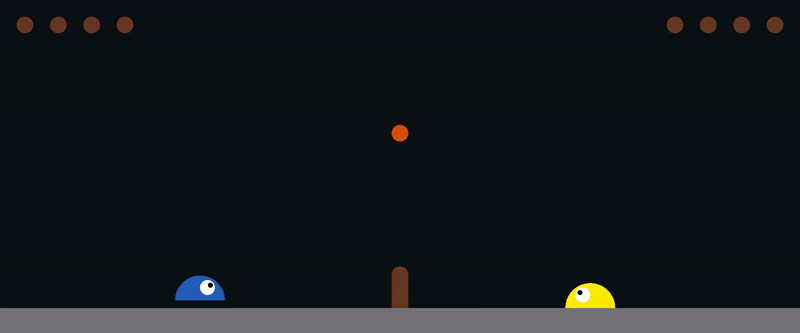](https://drive.google.com/file/d/1TSVcvY_u4FoLUMjSO6wKi33sYnT0Ss-1/view?usp=share_link "Everything Is AWESOME")




1. Start with installing required packages and importing libraries.

This time, installing will take longer than before!

In [1]:
!pip install setuptools==65.5.0 "wheel<0.40.0"

# install required system dependencies
!apt-get install -y xvfb x11-utils python-opengl ffmpeg

# !pip install -q gym==0.19.0
# install required python dependencies (might need to install additional gym extras depending)
!pip install gym[box2d]==0.17.* pyvirtualdisplay==0.2.* PyOpenGL==3.1.* PyOpenGL-accelerate==3.1.*
# Followings are for visualization (as we are running on server without a physical display!)
!pip install gym pyvirtualdisplay

!pip install -q stable-baselines3[extra]==1.4.0
!pip install -q slimevolleygym
!pip install pyglet
!sudo apt install xvfb
!sudo apt install ffmpeg
!pip3 install pyvirtualdisplay

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.6 MB/s eta 0:00:00
  Attempting uninstall: wheel
    Found existing installation: wheel 0.41.2
    Uninstalling wheel-0.41.2:
      Successfully uninstalled wheel-0.41.2
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
cvxpy 1.3.2 requires setuptools>65.5.1, but you have setuptools 65.5.0 which is incompatible.


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package python-opengl
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.5/374.5 kB 28.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for box2d-py
  Running setup.py clean for box2d-py
  Created wheel for gym: filename=gym-0.17.3-py3-none-any.whl size=1654623 sha256=e7dcefa36ea461dbdb254a2ad0a372c545d84c00baba951e207467215e452

In [4]:
!pip install colabgymrender

  Preparing metadata (setup.py) ... done
  Created wheel for colabgymrender: filename=colabgymrender-1.1.0-py3-none-any.whl size=3114 sha256=668fd5e48c2c0c8787b470d13145bf87686836a245a8178e38ede1c549ce5229
  Stored in directory: /root/.cache/pip/wheels/13/62/63/7b3acfb684dd3d665d7fc1d213427b136205a222389767e295
Successfully built colabgymrender


In [5]:
import gym
from stable_baselines3 import PPO, A2C, DQN
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.env_util import make_atari_env, make_vec_env
from stable_baselines3.common.vec_env import dummy_vec_env, VecFrameStack
import slimevolleygym
from colabgymrender.recorder import Recorder
from gym.wrappers import Monitor as eval_Monitor
import glob
import random
import io
import os
import base64
from IPython.display import HTML, clear_output
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display

display = Display(visible=0, size=(400, 300))
display.start()

2. Create environment, and let's begin with Stable Baselines 3 algorithms!

In [6]:
env = gym.make('SlimeVolleyNoFrameskip-v0')

algorithm = "PPO"
if algorithm == "DQN":
  model = DQN("CnnPolicy", env, verbose=1)
elif algorithm == "A2C":
  model = A2C("CnnPolicy", env, verbose=1)
elif  algorithm == "PPO":
  model = PPO("CnnPolicy", env, verbose=1)

model.learn(total_timesteps=1000)
model.save("CnnPolicy_volleyball_best")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 534      |
|    ep_rew_mean     | -5       |
| time/              |          |
|    fps             | 135      |
|    iterations      | 1        |
|    time_elapsed    | 15       |
|    total_timesteps | 2048     |
---------------------------------


3. Let's check the performance!!

<font color="red">[Warning] Do not interrupt **this** codeblock, wait until it's finished!!!</font>

In [7]:
def show_video(episode, rnd):
  mp4list = glob.glob(f'video_{episode}_{rnd}/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    os.system(f"ffmpeg -i {mp4} -vcodec libx264 video_{episode}_{rnd}/compressed.mp4")
    video = io.open(f'video_{episode}_{rnd}/compressed.mp4', 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay
                loop controls style="height: 200px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else:
    print("Could not find video")

def wrap_env(env, episode, rnd):
    env = eval_Monitor(env, f'./video_{episode}_{rnd}', force=True)
    return env

n_game = 2
init_seed = 1
cumulative_reward = 0
cumulative_win_str = []

for gi in range(n_game):
    env = gym.make('SlimeVolleyNoFrameskip-v0')
    vid_name = f'volleyball'
    rnd = random.randint(0, 1000)
    env = wrap_env(env, vid_name, rnd=rnd)
    obs1 = env.reset()

    done = False
    total_reward = 0

    while not done:
        action1, _ = model.predict(obs1)

        obs1, reward, done, info = env.step(action1)

        total_reward += reward

        env.render()

    cumulative_reward += total_reward

    if total_reward > 0:
        win_str = 'Agent 1 Wins!'
        cumulative_win_str.append('Agent 1')
    elif total_reward == 0:
        win_str = 'Draw'
        cumulative_win_str.append('Draw')
    else:
        win_str = 'Agent 2 Wins!'
        cumulative_win_str.append('Agent 2')

    print(f"            AGENT1 vs AGENT2")
    print(f"[{gi+1}th game]    {total_reward}    :    {-total_reward}    ||    {win_str}\n")

    env.close()
    show_video(vid_name, rnd=rnd)

print(f"\nResult : {cumulative_win_str}, Cumulative score : {cumulative_reward}")


            AGENT1 vs AGENT2
[1th game]    -5    :    5    ||    Agent 2 Wins!



            AGENT1 vs AGENT2
[2th game]    -5    :    5    ||    Agent 2 Wins!




Result : ['Agent 2', 'Agent 2'], Cumulative score : -10
